In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [1]:
#Preprocessing Steps
#1.Filling missing vaues
#2.converting catgorical values to numeric
#3. bring all variables to 0 to 1
import pandas as pd
data=pd.read_csv("loan_data_set.csv")
data.shape

(614, 13)

In [3]:

data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.dtypes
#data.head(5)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [31]:
#imputing the missing values, for categorical use mode
data["Gender"].fillna(data["Gender"].mode()[0],inplace=True)
data["Married"].fillna(data["Married"].mode()[0],inplace=True)
data["Dependents"].fillna(data["Dependents"].mode()[0],inplace=True)
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0],inplace=True)
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0],inplace=True)
data["Credit_History"].fillna(data["Credit_History"].mode()[0],inplace=True)

In [32]:
#for continuous data
data["LoanAmount"].fillna(data["LoanAmount"].mean(),inplace=True)

In [33]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
#converting categories to numbers using map
data["Gender"]= data["Gender"].map({'Male':0,'Female':1})
data["Married"]=data["Married"].map({'No':0,'Yes':1})
data["Dependents"]=data["Dependents"].map({'0':0,'1':1,'2':2,'3+':3})
data["Education"]=data["Education"].map({'Graduate':1,'Not Graduate': 0})
data["Self_Employed"]=data["Self_Employed"].map({'No':0,'Yes':1})
data["Property_Area"]=data["Property_Area"].map({'Rural':0,'Semi-urban':1,'Urban':2})
data["Loan_Status"]=data["Loan_Status"].map({'N':0,'Y':1})

In [35]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2.0,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2.0,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2.0,1
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2.0,1


In [11]:
#bringing all the variables in the range 0 to 1

In [21]:
data['Dependents']=(data['Dependents'] - data['Dependents'].min())/(data['Dependents'].max()-data['Dependents'].min())

In [36]:
#applying for loop to bring all the variables in the range of 0 to 1
for i in data.columns[1:]:
  data[i]=(data[i] - data[i].min())/(data[i].max()-data[i].min())

In [25]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,NaN,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,NaN,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,NaN,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,NaN,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,NaN,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [37]:
#data.to_csv("loan_prediction_data.csv",index=False)
#Compilation configures the model for training
#define the loss fn and optimizers to use to update the params during the back propogation 
#keras framework has pre written codes for diff loss fns like mse, binary entropy
#supports diff optimizers ike SGD, RMSPROP, Adam


# Steps to build a Neural Network using Keras

<ol>1. Loading the dataset</ol>
<ol>2. Creating training and validation set</ol>
<ol>3. Defining the architecture of the model</ol>
<ol>4. Compiling the model (defining loss function, optimizer)</ol>
<ol>5. Training the model</ol>
<ol>6. Evaluating model performance on training and validation set</ol>

## 1. Loading the dataset

In [42]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# check version on sklearn
print('Version of sklearn:', sklearn.__version__)

Version of sklearn: 0.22.2.post1


In [43]:
# loading the pre-processed dataset
data = pd.read_csv('loan_prediction_data.csv')

In [44]:
# looking at the first five rows of the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [4]:
# checking missing values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [5]:
# checking the data type
data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [6]:
# removing the loan_ID since these are just the unique values
data = data.drop('Loan_ID', axis=1)

In [7]:
# looking at the shape of the data
data.shape

(614, 12)

In [46]:
# separating the independent and dependent variables

# storing all the independent variables as X
X = data.drop('Loan_Status', axis=1)

# storing the dependent variable as y
y = data['Loan_Status']

In [47]:
# shape of independent and dependent variables
X.shape, y.shape

((614, 12), (614,))

## 2. Creating training and validation set

In [49]:
# Creating training and validation set

# stratify will make sure that the distribution of classes in train and validation set it similar
# random state to regenerate the same train and validation set
# test size 0.2 will keep 20% data in validation and remaining 80% in train set

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=data['Loan_Status'],random_state=10,test_size=0.2)

In [50]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((491, 12), (491,)), ((123, 12), (123,)))

## 3. Defining the architecture of the model

In [14]:
# checking the version of keras
import keras
print(keras.__version__)

2.4.3


In [16]:
# checking the version of tensorflow as tf uses keras at the back
import tensorflow as tf
print(tf.__version__)

2.4.1


### a. Create a model

<img src='https://drive.google.com/uc?id=1iZNZ3kwSHRNf-Irn3DZmMuBb6K-Lro7w'>

In [51]:
# importing the sequential model for neural network
from keras.models import Sequential
#Functional model later on

In [52]:
# importing different layers from keras, 3 layers, input, hidden an output, the dense is for defining the hidden and output
from keras.layers import InputLayer, Dense 

In [53]:
# number of input neurons = no of input features
X_train.shape

(491, 12)

In [22]:
# number of features in the data
X_train.shape[1]

11

In [55]:
# defining input neurons
input_neurons = X_train.shape[1]

In [23]:
# number of output neurons

# since loan prediction is a binary classification problem, we will have single neuron in the output layer 

In [56]:
# define number of output neurons as binary classification so 1
output_neurons = 1

In [ ]:
# number of hidden layers and hidden neurons we are setting as 2

# It is a hyperparameter and we can pick the hidden layers and hidden neurons on our own

In [57]:
# define hidden layers and neuron in each layer (u can change anything they are hyperparameters)
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

In [ ]:
# activation function of different layers

# for now I have picked relu as an activation function for hidden layers, you can change it as well tanh
# since it is a binary classification problem, I have used sigmoid activation function in the final layer

In [58]:
# defining the architecture of the model
#to add layers use add and to set the no of neurons use units=
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [60]:
# summary of the model, trainable parameters for each of the layer,
# 10 bias values also and learnt during training process
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                130       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [30]:
# number of parameters between input and first hidden layer-10 neurons * 11 * 10

input_neurons*neuron_hidden_layer_1

110

In [ ]:
# number of parameters between input and first hidden layer

# adding the bias for each neuron of first hidden layer

input_neurons*neuron_hidden_layer_1 + 10

120

In [ ]:
# number of parameters between first and second hidden layer

neuron_hidden_layer_1*neuron_hidden_layer_2 + 5

55

In [ ]:
# number of parameters between second hidden and output layer

neuron_hidden_layer_2*output_neurons + 1

6

## 4. Compiling the model (defining loss function, optimizer)

In [61]:
# compiling the model

# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam
# Evaluation metric as accuracy

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

## 5. Training the model

In [32]:
# training the model

# passing the independent and dependent features for training set for training the model

# validation data will be evaluated at the end of each epoch

# setting the epochs as 50

# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
16/16 [==============================] - 4s 29ms/step - loss: 0.8068 - accuracy: 0.3335 - val_loss: 0.7454 - val_accuracy: 0.3171
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7500 - accuracy: 0.3629 - val_loss: 0.7147 - val_accuracy: 0.3740
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7121 - accuracy: 0.4130 - val_loss: 0.6982 - val_accuracy: 0.5122
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6984 - accuracy: 0.5579 - val_loss: 0.6885 - val_accuracy: 0.6260
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6905 - accuracy: 0.5989 - val_loss: 0.6822 - val_accuracy: 0.6423
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6836 - accuracy: 0.6501 - val_loss: 0.6781 - val_accuracy: 0.6748
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6791 - accuracy: 0.6730 - val_loss: 0.6743 - val_accuracy: 0.7073
Epoch 8/50
16/16 [=

## 6. Evaluating model performance on validation set

In [33]:
# getting predictions for the validation set
prediction = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [34]:
# calculating the accuracy on validation set
accuracy_score(y_test, prediction)

0.6910569105691057

### Visualizing the model performance

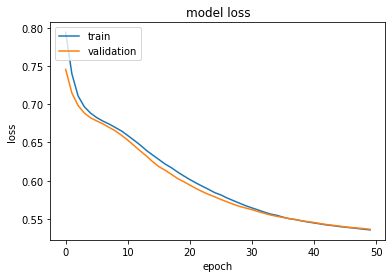

In [37]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

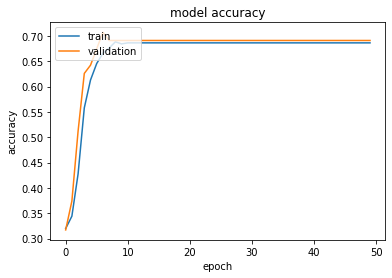

In [39]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()